# Introductory-level Tutorial for Spatial Analytics with Python


Author: [Adelson Araujo Jr](https://adaj.github.io) (adelsondias@live.com)

To better visualize this notebook, please access http://nbviewer.jupyter.org/github/adaj/spatial-analytics-tutorials/blob/master/introductory-level.ipynb.


## Topics:

1. Elementary geometries

2. Geometric data structures

3. Spatial Join

4. File I/O

5. Coordinate systems

6. Map visualization


## 1. Elementary geometries

http://toblerity.org/shapely/manual.html

In [1]:
from shapely.geometry import Point, LineString, Polygon

### 1.a. Points

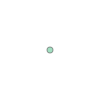

In [2]:
p1 = Point([1,1,0])
p1

In [3]:
print('coordinates:',p1.coords[0])

coordinates: (1.0, 1.0, 0.0)


### 1.b. LineStrings

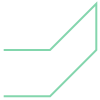

In [4]:
l1 = LineString([(0,0), (1,0), (2,1), (2,2), (1,1),(0,1)])
l1

In [5]:
print('coordinates:',l1.coords[:])
print('length:',l1.length)

coordinates: [(0.0, 0.0), (1.0, 0.0), (2.0, 1.0), (2.0, 2.0), (1.0, 1.0), (0.0, 1.0)]
length: 5.82842712474619


### 1.c. Polygons

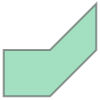

In [6]:
g1 = Polygon([(0,0), (1,0), (2,1), (2,2), (1,1),(0,1)])
g1

In [7]:
print('coordinates:',g1.exterior.coords[:])
print('length (perimeter):',g1.length)
print('area:',g1.area)
print('centroid:',g1.centroid)

coordinates: [(0.0, 0.0), (1.0, 0.0), (2.0, 1.0), (2.0, 2.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)]
length (perimeter): 6.82842712474619
area: 2.0
centroid: POINT (1 0.75)


### 1.d. Collections

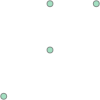

In [8]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

MultiPoint([(0, 0), (1, 1), (1,2), (2,2)])

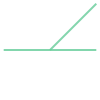

In [9]:
MultiLineString([((0, 0), (1, 1)), ((-1, 0), (1, 0))])

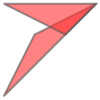

In [10]:
MultiPolygon([Polygon([(0,0),(1,2), (3,3)]), Polygon([(0,3),(3,3), (2,2)])])

### 1.e. Some additional stuff you can do with geometries

<class 'shapely.geometry.polygon.Polygon'>


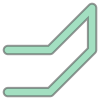

In [11]:
# Buffering (LineString or Point)
bf1 = l1.buffer(0.1)
print(type(bf1))
bf1

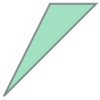

In [12]:
# Convex Hulls (MultiPoint)
MultiPoint([(0, 0), (1, 1), (1,2), (2,2)]).convex_hull

## 2. Geometric data structures

http://geopandas.org

In [13]:
import geopandas as gpd

### 2.a. GeoDataFrame

In [14]:
points = [(0,1), (1,3), (3,1), (2,0), (2,2)]
lis = []
for p in points:
    lis.append(Point(p))
lis

In [15]:
geodf = gpd.GeoDataFrame(geometry=lis)
geodf

,geometry
0,POINT (0 1)
1,POINT (1 3)
2,POINT (3 1)
3,POINT (2 0)
4,POINT (2 2)


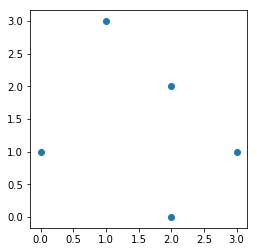

In [17]:
%matplotlib inline

geodf.plot()

In [18]:
geodf['value'] = [13,23,10,15,2]
geodf

,geometry,value
0,POINT (0 1),13
1,POINT (1 3),23
2,POINT (3 1),10
3,POINT (2 0),15
4,POINT (2 2),2


In [19]:
geodf['name'] = ['thing a', 'thing b', 'thing c', 'thing d', 'thing e']
geodf.set_index('name', inplace=True)
geodf

,geometry,value
name,,
thing a,POINT (0 1),13
thing b,POINT (1 3),23
thing c,POINT (3 1),10
thing d,POINT (2 0),15
thing e,POINT (2 2),2


#### 2.a.1. Special usage for GeoDataFrames: "Meshgrid"

In [20]:
import numpy as np
dimensions = [20,20]
longitude_range = [-1.8, -1.51]
longitude_array = np.linspace(longitude_range[0], longitude_range[1], dimensions[0])
print(longitude_array)
                              
latitude_range = [54.96, 55.05]
latitude_array = np.linspace(latitude_range[0], latitude_range[1], dimensions[1])
print(latitude_array)

[-1.8        -1.78473684 -1.76947368 -1.75421053 -1.73894737 -1.72368421
 -1.70842105 -1.69315789 -1.67789474 -1.66263158 -1.64736842 -1.63210526
 -1.61684211 -1.60157895 -1.58631579 -1.57105263 -1.55578947 -1.54052632
 -1.52526316 -1.51      ]
[54.96       54.96473684 54.96947368 54.97421053 54.97894737 54.98368421
 54.98842105 54.99315789 54.99789474 55.00263158 55.00736842 55.01210526
 55.01684211 55.02157895 55.02631579 55.03105263 55.03578947 55.04052632
 55.04526316 55.05      ]


In [21]:
meshgrid_lons, meshgrid_lats = np.meshgrid(longitude_array, latitude_array)
meshgrid = np.vstack([meshgrid_lons.ravel(), meshgrid_lats.ravel()]).T
meshgrid

array([[-1.8       , 54.96      ],
       [-1.78473684, 54.96      ],
       [-1.76947368, 54.96      ],
       [-1.75421053, 54.96      ],
       [-1.73894737, 54.96      ],
       [-1.72368421, 54.96      ],
       [-1.70842105, 54.96      ],
       [-1.69315789, 54.96      ],
       [-1.67789474, 54.96      ],
       [-1.66263158, 54.96      ],
       [-1.64736842, 54.96      ],
       [-1.63210526, 54.96      ],
       [-1.61684211, 54.96      ],
       [-1.60157895, 54.96      ],
       [-1.58631579, 54.96      ],
       [-1.57105263, 54.96      ],
       [-1.55578947, 54.96      ],
       [-1.54052632, 54.96      ],
       [-1.52526316, 54.96      ],
       [-1.51      , 54.96      ],
       [-1.8       , 54.96473684],
       [-1.78473684, 54.96473684],
       [-1.76947368, 54.96473684],
       [-1.75421053, 54.96473684],
       [-1.73894737, 54.96473684],
       [-1.72368421, 54.96473684],
       [-1.70842105, 54.96473684],
       [-1.69315789, 54.96473684],
       [-1.67789474,

In [22]:
meshgrid = gpd.GeoDataFrame(meshgrid, geometry=[Point(xy) for xy in meshgrid],crs={'init': 'epsg:4326'})
meshgrid.rename(columns={0:'lon',1:'lat'}, inplace=True)
meshgrid.head()

,lon,lat,geometry
0,-1.800000,54.96,POINT (-1.8 54.96)
1,-1.784737,54.96,POINT (-1.784736842105263 54.96)
2,-1.769474,54.96,POINT (-1.769473684210526 54.96)
3,-1.754211,54.96,POINT (-1.754210526315789 54.96)
4,-1.738947,54.96,POINT (-1.738947368421053 54.96)


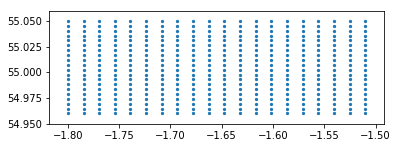

In [23]:
meshgrid.plot(markersize=5)

## 3. Spatial joins

In [24]:
geodf2 = gpd.GeoDataFrame(geometry=[Polygon([(1,1),(0.5,4),(2.5,2)])]) # triangle

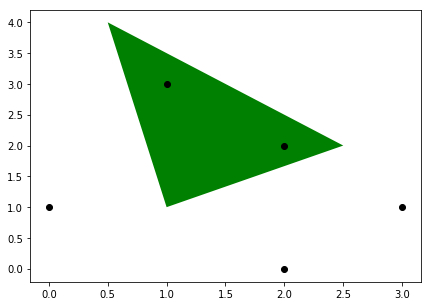

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(7,5))
geodf.plot(ax=axes, color='black', zorder=2)
geodf2.plot(ax=axes, color='green', zorder=1)

In [26]:
gpd.sjoin(geodf, geodf2, op='intersects') # contains, within...

,geometry,value,index_right
thing b,POINT (1 3),23,0
thing e,POINT (2 2),2,0


#### Homework:

1) Using loop routines (for/while), build a meshgrid geodataframe without using "np.meshgrid" or any off-the-shelf method.

2) Measure the time that your solution takes to build it and compare this time with np.meshgrid. If your solution is worst, search about "vectorization and numpy".

3) Using spatial join, build a circular meshgrid

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

## 4. File I/O

Download the shapefile for this example [here](http://geoportal.statistics.gov.uk/datasets/826dc85fb600440889480f4d9dbb1a24_1). Unzip and set the right path in the `shapefile_path` above.

In [27]:
shapefile_path = ''
shape = gpd.read_file(shapefile_path)
shape.head()

,objectid,msoa11cd,msoa11nm,msoa11nmw,st_areasha,st_lengths,geometry
0,1,E02000001,City of London 001,City of London 001,3.151466e+06,9651.748978,"POLYGON ((532153.7029999997 182165.1549999993,..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,2.161566e+06,8307.438185,"POLYGON ((548881.3039999995 190819.9800000004,..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,2.141517e+06,9360.577026,"POLYGON ((548958.5549999997 189072.1760000009,..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,2.492951e+06,8572.398748,"POLYGON ((551549.9979999997 187364.6370000001,..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,1.187954e+06,7322.796509,"POLYGON ((549237.051 187627.9409999996, 549241..."


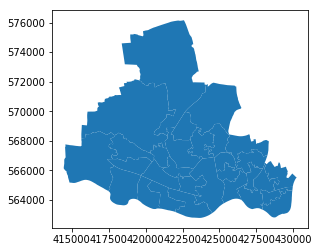

In [28]:
newcastle = shape.loc[shape['msoa11nm'].str.contains('Newcastle upon Tyne')]
newcastle.plot()

In [30]:
newcastle.to_file("newcastle.geojson", driver="GeoJSON")

In [31]:
# testing if output is ok
test = gpd.read_file("newcastle.geojson")
test.head()

,objectid,msoa11cd,msoa11nm,msoa11nmw,st_areasha,st_lengths,geometry
0,2093,E02001708,Newcastle upon Tyne 001,Newcastle upon Tyne 001,2.178306e+07,28600.589881,"POLYGON ((422592.4060000004 576160.1260000002,..."
1,2094,E02001709,Newcastle upon Tyne 002,Newcastle upon Tyne 002,8.063988e+06,14587.646396,"POLYGON ((426062.7479999997 571689.9489999991,..."
2,2095,E02001710,Newcastle upon Tyne 003,Newcastle upon Tyne 003,1.988144e+06,6221.218967,"POLYGON ((422725.7000000002 569941.6989999991,..."
3,2096,E02001711,Newcastle upon Tyne 004,Newcastle upon Tyne 004,1.787517e+07,26762.619074,"POLYGON ((419715.4060000004 571997.125, 419729..."
4,2097,E02001712,Newcastle upon Tyne 005,Newcastle upon Tyne 005,2.052218e+06,10613.816115,"POLYGON ((425032.0939999996 569159, 425046.814..."


## 5. Coordinate systems

For further information, read this [wikipedia article](https://en.wikipedia.org/wiki/Geographic_coordinate_system).

How to convert `newcastle` dataframe to latitude/longitude coordinate system?

In [32]:
newcastle.crs

{'proj': 'tmerc',
 'lat_0': 49,
 'lon_0': -2,
 'k': 0.9996012717,
 'x_0': 400000,
 'y_0': -100000,
 'datum': 'OSGB36',
 'units': 'm',
 'no_defs': True,
 'wktext': True}

In [33]:
import fiona
newcastle = newcastle.to_crs(fiona.crs.from_epsg(4326))
newcastle.head()

,objectid,msoa11cd,msoa11nm,msoa11nmw,st_areasha,st_lengths,geometry
2092,2093,E02001708,Newcastle upon Tyne 001,Newcastle upon Tyne 001,2.178306e+07,28600.589881,"POLYGON ((-1.64766724046026 55.07938255874537,..."
2093,2094,E02001709,Newcastle upon Tyne 002,Newcastle upon Tyne 002,8.063988e+06,14587.646396,POLYGON ((-1.593718746016063 55.03904501422733...
2094,2095,E02001710,Newcastle upon Tyne 003,Newcastle upon Tyne 003,1.988144e+06,6221.218967,POLYGON ((-1.646072268197443 55.02349830423939...
2095,2096,E02001711,Newcastle upon Tyne 004,Newcastle upon Tyne 004,1.787517e+07,26762.619074,POLYGON ((-1.693015628041053 55.04209602329357...
2096,2097,E02001712,Newcastle upon Tyne 005,Newcastle upon Tyne 005,2.052218e+06,10613.816115,POLYGON ((-1.610066148289959 55.01635486589081...


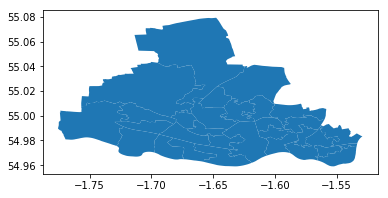

In [34]:
newcastle.plot()

## 6. Map visualization

In [35]:
import folium

In [36]:
m = folium.Map(location=[55., -1.61],
                tiles = "Stamen Toner", #"Stamen Terrain", others...
                zoom_start = 11)

# # Simple marker
folium.Marker([54.95, -1.65],
      popup='Nice point',
      icon=folium.Icon(color='red')
     ).add_to(m)

# # Circle marker
folium.CircleMarker([55.0, -1.55],
        radius=50,
        popup='Great circle',
        color='red',
).add_to(m)

m

In [37]:
newcastle[['msoa11nm','geometry','st_areasha']][:5]

,msoa11nm,geometry,st_areasha
2092,Newcastle upon Tyne 001,"POLYGON ((-1.64766724046026 55.07938255874537,...",2.178306e+07
2093,Newcastle upon Tyne 002,POLYGON ((-1.593718746016063 55.03904501422733...,8.063988e+06
2094,Newcastle upon Tyne 003,POLYGON ((-1.646072268197443 55.02349830423939...,1.988144e+06
2095,Newcastle upon Tyne 004,POLYGON ((-1.693015628041053 55.04209602329357...,1.787517e+07
2096,Newcastle upon Tyne 005,POLYGON ((-1.610066148289959 55.01635486589081...,2.052218e+06


In [38]:
m = folium.Map(location=[55.035, -1.62],
                tiles = "Stamen Toner", 
                zoom_start = 12)
folium.GeoJson(newcastle[:5]).add_to(m)
m

In [39]:
m = folium.Map(location=[55.035, -1.62],
                tiles = "Stamen Toner", 
                zoom_start = 12)

m.choropleth(geo_data=newcastle.set_index('msoa11nm')[['geometry']][:5], 
             data=newcastle.set_index('msoa11nm')['st_areasha'][:5],
             key_on='feature.id',
             fill_color='Spectral_r')
m